## Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. **The aim is to build a predictive model and predict the sales of each product at a particular outlet.**

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

In [1]:
# Import the Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the Dataset
train = pd.read_csv("train_v9rqX0R.csv")
test = pd.read_csv("test_AbJTz2l.csv")

In [3]:
# Preview the Train
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Preview the Test
# Remember that the test set will have n-1 columns
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
# Check the dimensions of the data

train.shape, test.shape

((8523, 12), (5681, 11))

In [6]:
# Combine the Datasets

combined = pd.concat([train, test], ignore_index = True)

In [7]:
combined.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [8]:
# Check the Info of the Data
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [9]:
# Run the Summary Statistics of the Dataset
combined.describe(include = "all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400


### Univariate Analysis

* Numerical Variables - Distplot
* Categorical Vars - Countplot / Frequency Plot

In [10]:
num_vars = combined.select_dtypes(include = np.number).columns
print(num_vars)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


In [11]:
cat_vars = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [12]:
len(num_vars), len(cat_vars)

(5, 6)

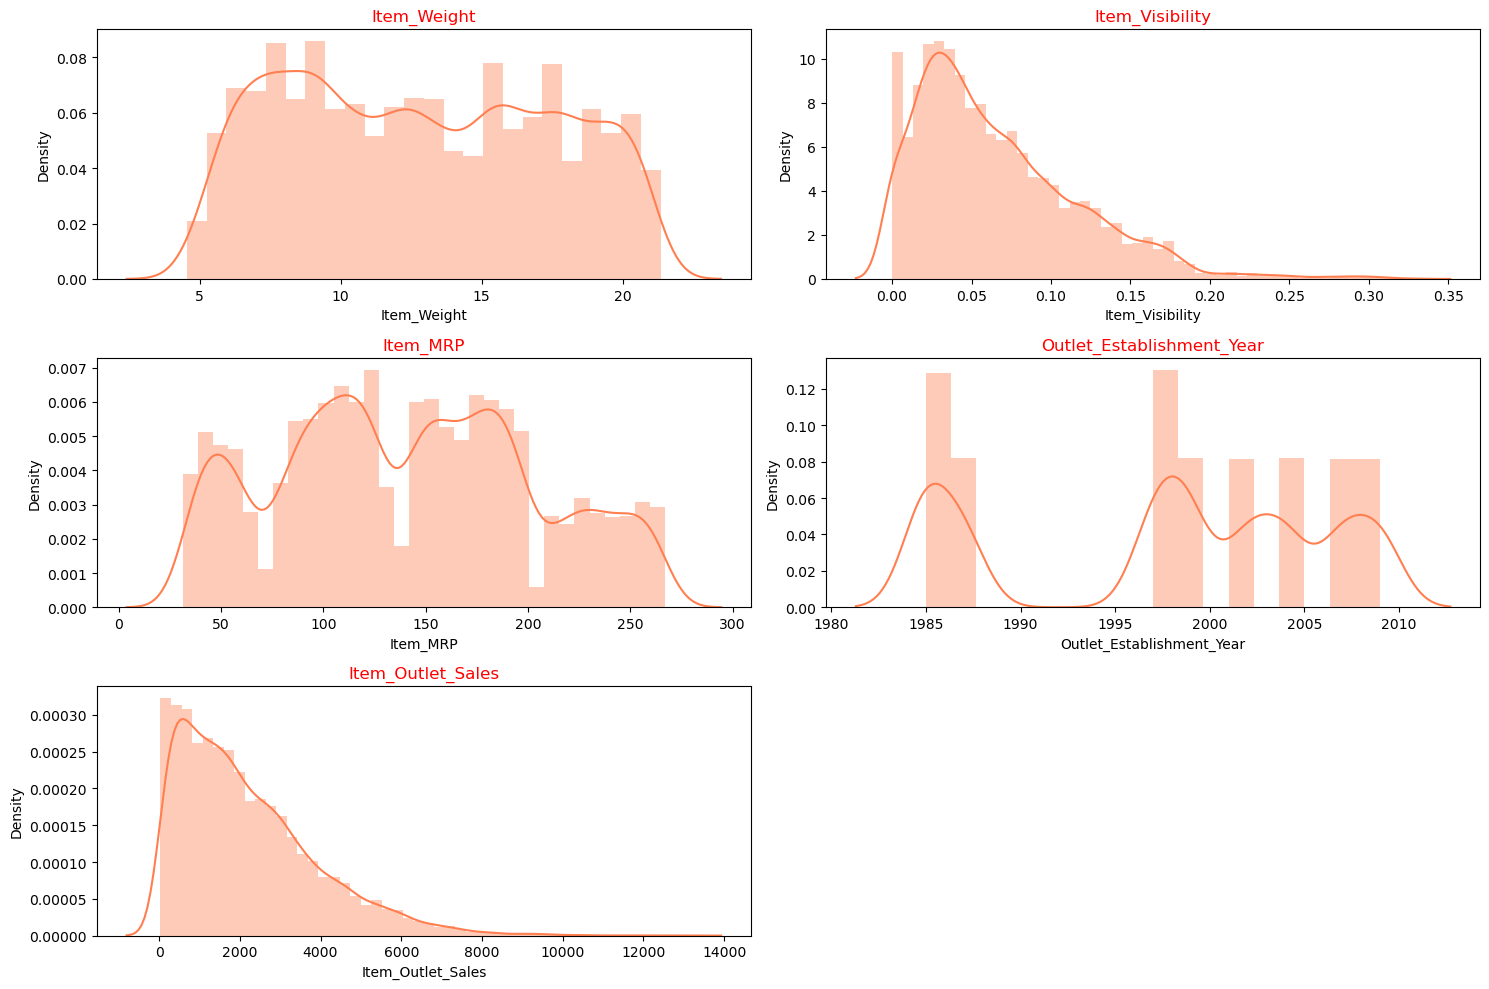

In [13]:
# Plot the Numerical Variables...

nrows = 3
ncols = 2
iterator = 1

plt.figure(figsize = (15, 10))
for i in num_vars:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(combined.loc[:, i], color = "coral")
    plt.title(i, color = "red")
    iterator+=1
    
plt.tight_layout()
plt.show()

#### Inference: Univariate (Num Vars)

* Target Variable (Sales) is highly Skewed in Nature. This means that there are products that have high pricing and at the same time, people are also buying those products.

* MRP seems have to Bimodal proprerty which means that there is no single pice that dominates or drives the sales. There are multiple price points that are the deciding factor of the Sales.

* Out Est Year is Categorical and therefore, no pattern in the Distplot...

* Item Weight, as we see is Uniform in Nature. It means that the item weight of all the products falls in a certain range giving a feel of Unformity.

* Item Visibility is skewed which means some products have a higher visibility than the rest.

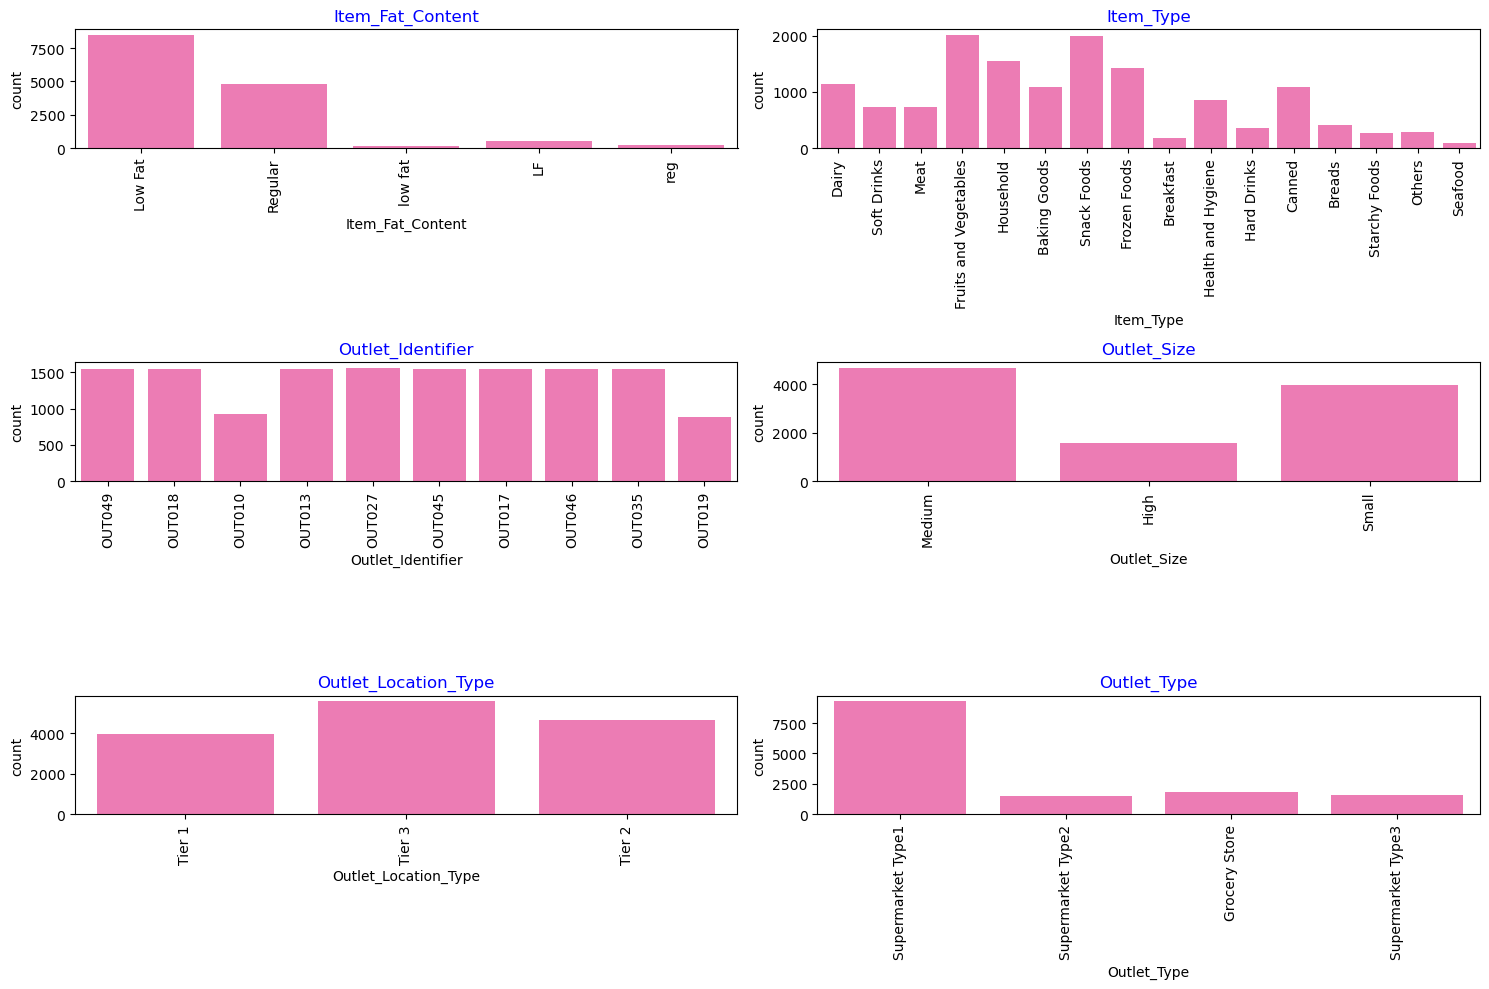

In [14]:
# Cat Data

nrows = 3
ncols = 2
repeater = 1

plt.figure(figsize=(15, 10))
for i in cat_vars:
    plt.subplot(nrows, ncols, repeater)
    sns.countplot(combined.loc[:, i], color = "hotpink")
    plt.title(i, color = "blue")
    plt.xticks(rotation = 90)
    repeater=repeater+1
    
plt.tight_layout()
plt.show()

In [15]:
# Item Type
print("Top 5 Items: ", combined.Item_Type.value_counts()[:5].index)

Top 5 Items:  Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy'],
      dtype='object')


<AxesSubplot:>

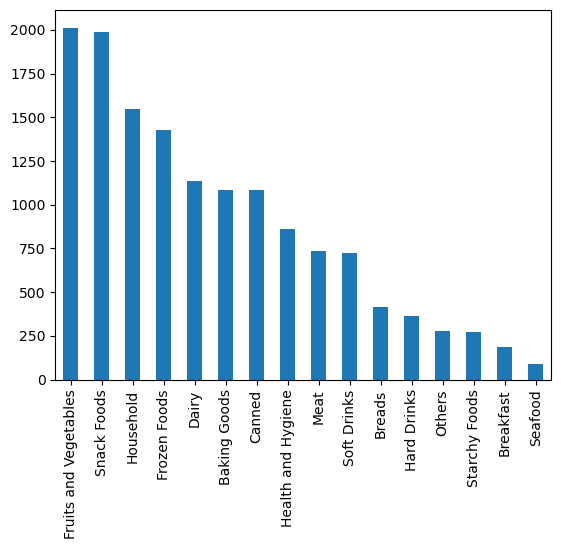

In [16]:
# Plot the Item Type
combined.Item_Type.value_counts().plot(kind = "bar")

<AxesSubplot:>

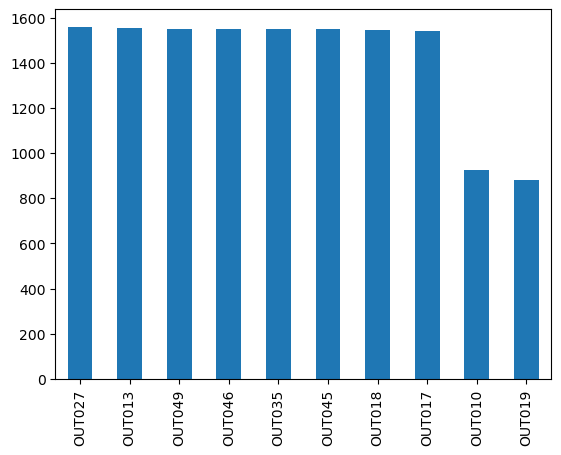

In [17]:
combined.Outlet_Identifier.value_counts().plot(kind = "bar")
# Two Outlets having Lowest Frequency : OUT010 and OUT019 

In [18]:
# Fix the Item Fat Content
combined.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [19]:
combined.Item_Fat_Content.replace(to_replace = ["LF", "low fat", "reg"],
                                 value = ["Low Fat", "Low Fat", "Regular"],
                                 inplace = True)

In [20]:
combined.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

### Bivariate Analysis

* Num vs Num ~ Scatterplot
* Cat vs Num ~ Boxplot

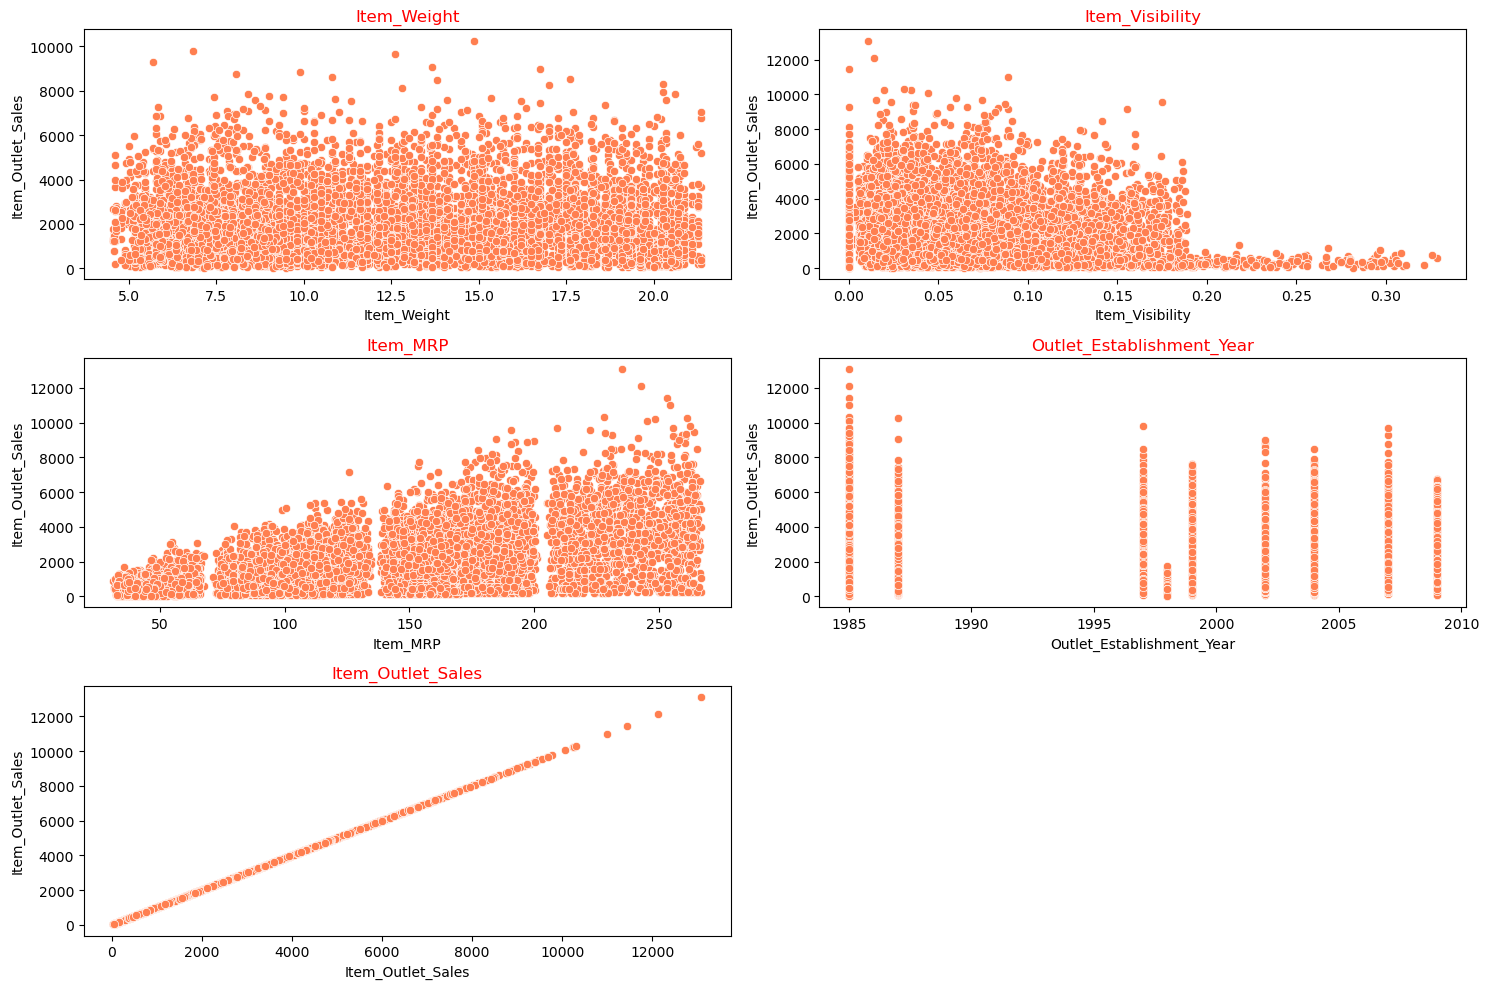

In [21]:
nrows = 3
ncols = 2
iterator = 1

plt.figure(figsize = (15, 10))
for i in num_vars:
    plt.subplot(nrows, ncols, iterator)
    sns.scatterplot(combined.loc[:, i], combined.Item_Outlet_Sales,color = "coral")
    plt.title(i, color = "red")
    iterator+=1
    
plt.tight_layout()
plt.show()

* Item Weight has no pattern with the Outlet Sales. It means the Correlation will also be very low.
* However, we see a strong pattern with MRP. This means the MRP can be a strong predictor for the target.
* Item Visibility has a negative correlation with Sales. As the Visibility Increases, Sales go down.
* There are lot of 0s in Item Visibility.

### Missing Values

* There are 3 Features which have Missing Values - Item Visibility (0s), Item_Weight & Outlet_Size.


In [22]:
# generate the list of missing values

combined.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [23]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [24]:
# Lambda 

combined["Item_Weight"] =combined.groupby("Item_Identifier")\
["Item_Weight"].apply(lambda x:x.fillna(x.mean()))

In [25]:
combined[combined.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [26]:
combined["Item_Visibility"] = combined.groupby("Item_Identifier")\
['Item_Visibility'].apply(lambda x:x.replace(to_replace = 0, value = x.mean()))

In [27]:
combined[combined.Item_Visibility==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [28]:
# Outlet Size
pd.DataFrame(combined.groupby("Outlet_Type")['Outlet_Size'].value_counts()).T

Outlet_Type Grocery Store Supermarket Type1              Supermarket Type2  \
Outlet_Size         Small             Small  High Medium            Medium   
Outlet_Size           880              3100  1553   1550              1546   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  
Outlet_Size              1559

In [29]:
combined.loc[combined.Outlet_Size.isnull(), "Outlet_Location_Type"].unique()

array(['Tier 3', 'Tier 2'], dtype=object)

In [30]:
combined.groupby(["Outlet_Type", "Outlet_Size", "Outlet_Location_Type"])\
["Outlet_Identifier"].value_counts()

Outlet_Type        Outlet_Size  Outlet_Location_Type  Outlet_Identifier
Grocery Store      Small        Tier 1                OUT019                880
Supermarket Type1  High         Tier 3                OUT013               1553
                   Medium       Tier 1                OUT049               1550
                   Small        Tier 1                OUT046               1550
                                Tier 2                OUT035               1550
Supermarket Type2  Medium       Tier 3                OUT018               1546
Supermarket Type3  Medium       Tier 3                OUT027               1559
Name: Outlet_Identifier, dtype: int64

In [31]:
combined.loc[combined.Outlet_Size.isnull(), "Outlet_Identifier"].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [32]:
# Imputting Small where the Outlet Size is Grocery

combined.loc[(combined.Outlet_Type=="Grocery Store") & \
             (combined.Outlet_Size.isnull()), "Outlet_Size"]="Small"

In [33]:
combined.loc[(combined.Outlet_Type=="Supermarket Type1") & \
             (combined.Outlet_Size.isnull()), "Outlet_Size"]="Small"

In [34]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

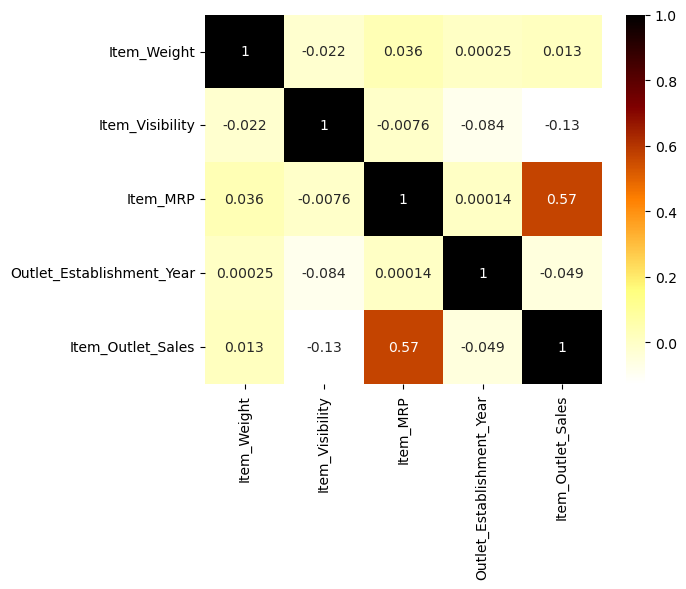

In [35]:
# generate the correlation plot

sns.heatmap(combined.loc[:, num_vars].corr(), annot = True, cmap = "afmhot_r")
plt.show()

# Apart from MRP, there is no good correlation

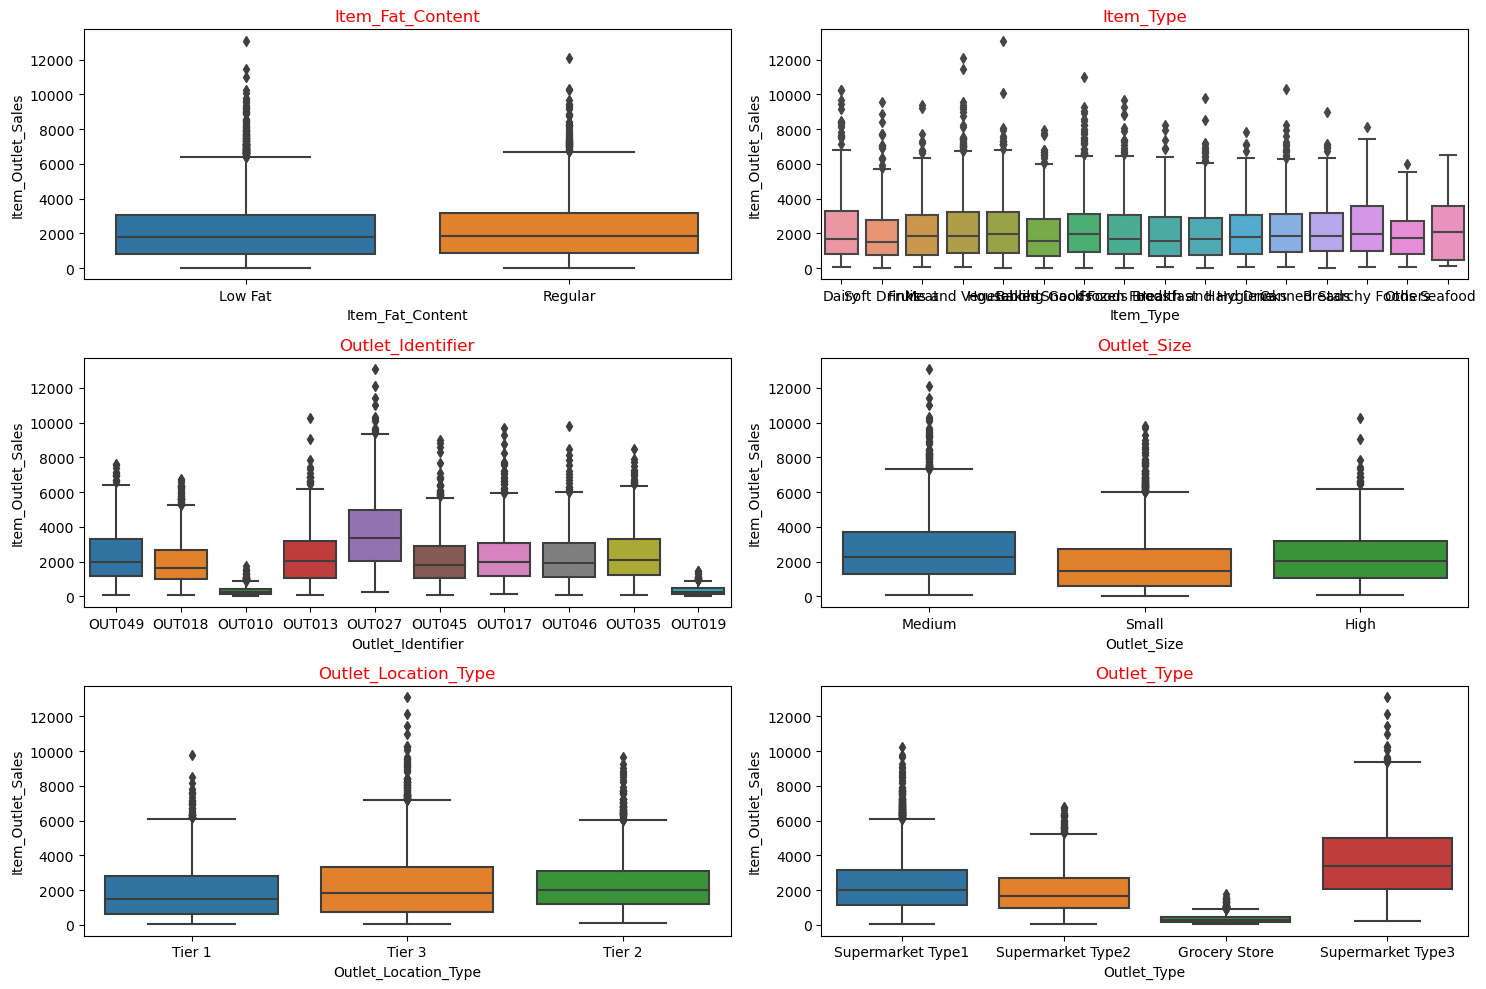

In [36]:
# Bivariate Analysis - Cat vs Num

nrows = 3
ncols = 2
iterator = 1

plt.figure(figsize = (15, 10))
for i in cat_vars:
    plt.subplot(nrows, ncols, iterator)
    sns.boxplot(combined.loc[:, i], combined.Item_Outlet_Sales)
    plt.title(i, color = "red")
    iterator+=1
    
plt.tight_layout()
plt.show()

Inference:

* In Bivariate Analysis (Cat vs Num), we have Tier 3 having highest sales, followed by S3 & medium size outlets make lot of money.

* The Outlet ID that has the max sales is OUT027.

* Out010 and OUT019 are the weak performers in the business.

* Grocery store in Outlet Types have the lowest Sales

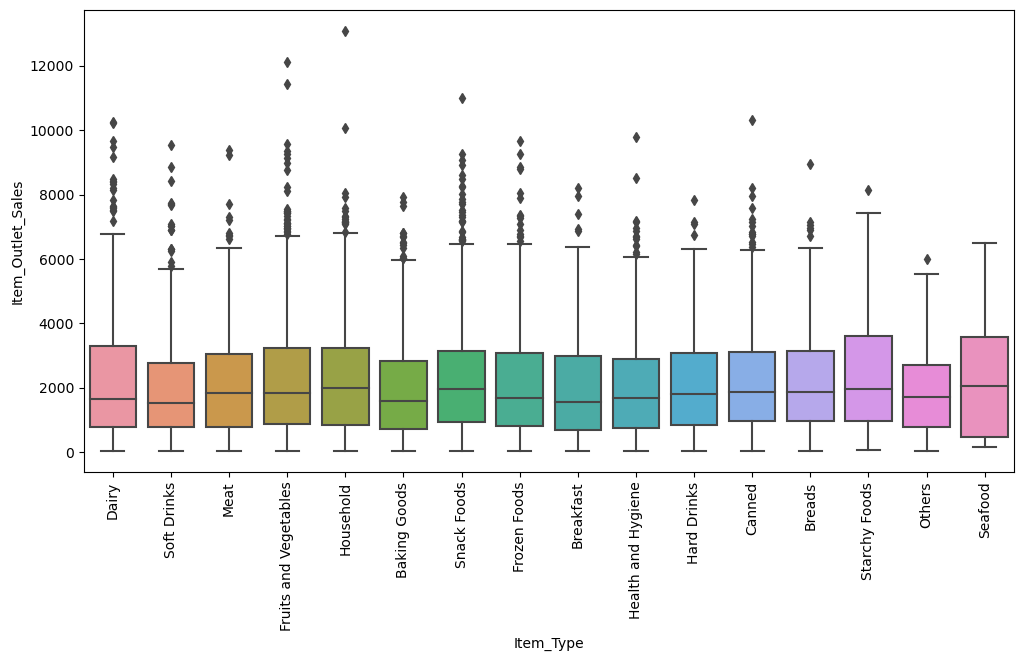

In [37]:
# Item Type vs Sales

plt.figure(figsize = (12, 6))
sns.boxplot(x = "Item_Type", y = "Item_Outlet_Sales", data = combined)
plt.xticks(rotation = 90)
plt.show()

# The Top 5 Selling Items have the Highest Sales....

### Outlier Identification

<AxesSubplot:xlabel='Item_Outlet_Sales'>

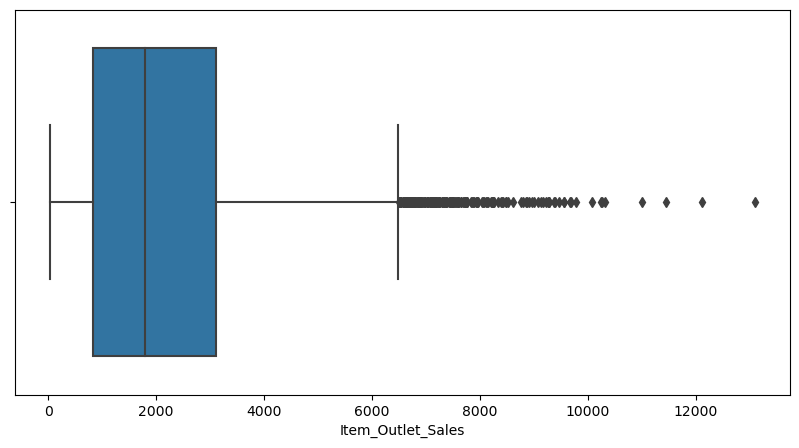

In [38]:
plt.figure(figsize = (10, 5))
sns.boxplot(combined.Item_Outlet_Sales)

* How many rows are lost after outlier removal - 186 rows are dropped 
* 2. Check the Correlation - is it improving or not - No the correlation is still the same

Note: Outlier Removal is always done on Training Set. 8500

**Lets Apply Winsorization and See if it works**

In [39]:
from scipy.stats.mstats import winsorize

In [40]:
new = combined.copy()
for i in combined.columns:
    winsorized_data = winsorize(combined.loc[:, i], limits=(0.01, 0.01))
    new[i+"_Winsorized"] = winsorized_data

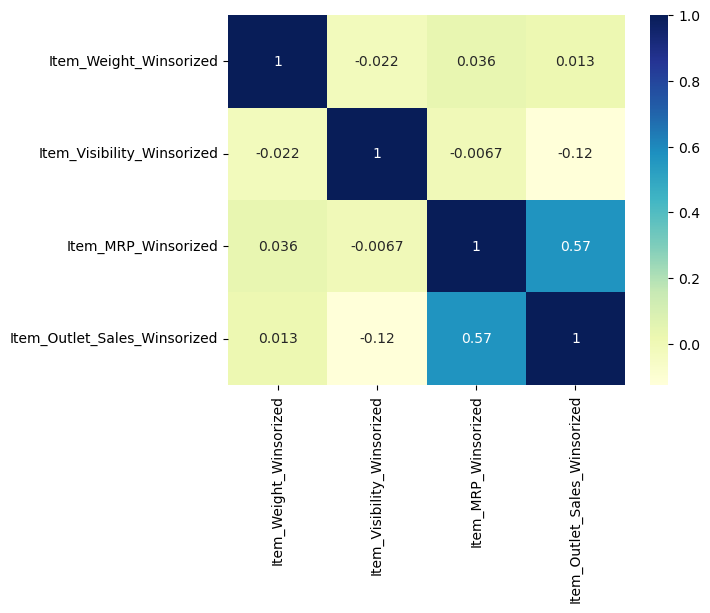

In [41]:
cols = ['Item_Weight_Winsorized','Item_Visibility_Winsorized','Item_MRP_Winsorized',
       'Item_Outlet_Sales_Winsorized']

sns.heatmap(new.loc[:, cols].corr(), annot = True, cmap = 'YlGnBu')
plt.show()


Our Final Conclusion is that there is no change in the Correlation between Num Vars after Winsorization.

So, we will go with the Original Data without any change.

In [42]:
del(new)

## Feature Engineering

In [43]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [44]:
# Extract the First Two letters from Item ID
combined.Item_Identifier[0][:2]

'FD'

In [45]:
ids = []
for i in combined.Item_Identifier:
    ids.append(i[:2])

In [46]:
# Create a new variable in the dataset

In [47]:
combined["item_ids"] = pd.Series(ids)

In [48]:
# Where it is NC in Item IDs, we will replace Low Fat to Non Edible in IFC

combined.loc[(combined.item_ids=="NC") & \
             (combined.Item_Fat_Content=="Low Fat"), \
             "Item_Fat_Content"]="Non Edible"

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

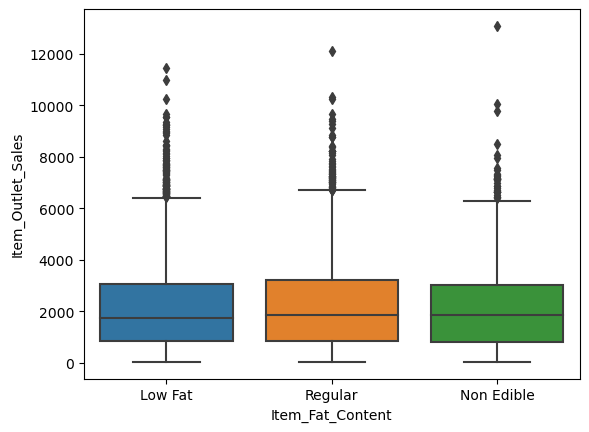

In [49]:
# Plot
sns.boxplot(x = "Item_Fat_Content", y = "Item_Outlet_Sales", data = combined)

In [50]:
# Convert the Item Type into Perishable and Non Perishable...

combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [51]:
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables',
               'Breakfast','Breads',  'Seafood']

In [52]:
def perish(x):
    if x in perishables:
        return("Perishables")
    else:
        return("Non_Perishables")

In [53]:
combined["Item_Type_Cat"] = combined.Item_Type.apply(perish)

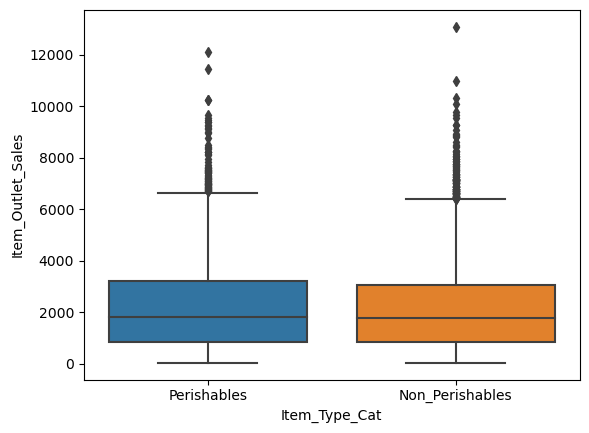

In [54]:
sns.boxplot(x = "Item_Type_Cat", y ="Item_Outlet_Sales", data = combined)
plt.show()

In [55]:
# Price Per Unit
combined["Price_Per_Unit"] = combined["Item_MRP"]/combined["Item_Weight"]

In [56]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,item_ids,Item_Type_Cat,Price_Per_Unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishables,8.153581


In [57]:
# Vintage of the Outlet
combined["Vintage"] = 2013 - combined.Outlet_Establishment_Year

<AxesSubplot:>

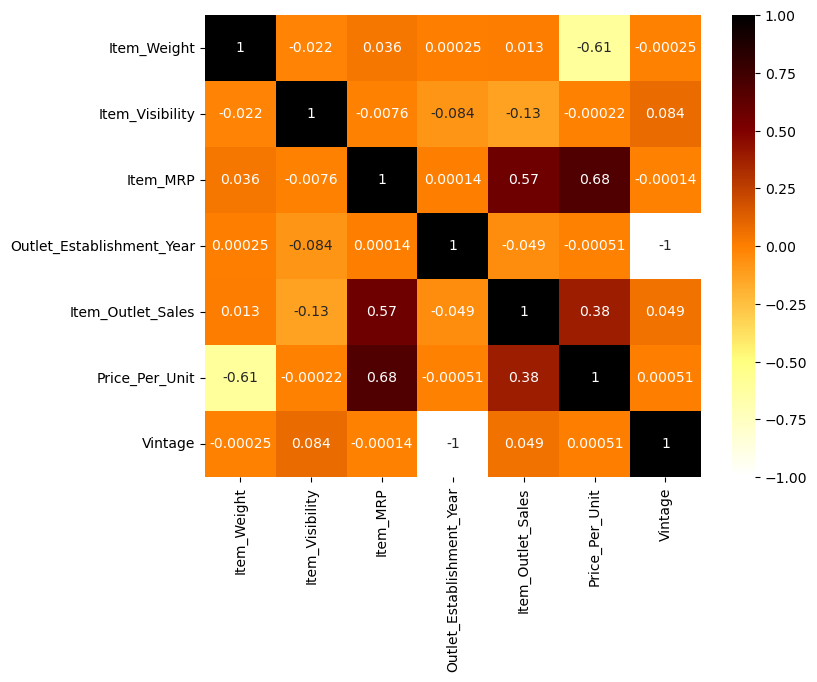

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(combined.corr(), annot = True, cmap = "afmhot_r")

In [59]:
combined.groupby("Outlet_Identifier")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
OUT013,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
OUT017,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
OUT018,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
OUT019,528.0,340.329723,249.979449,33.9558,153.63335,265.3213,460.73360,1482.0708
OUT027,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648
OUT035,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
OUT045,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
OUT046,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362


In [60]:
# Outlets ~ Target encoding
combined["magic1"] = combined.groupby("Outlet_Identifier")\
["Item_Outlet_Sales"].transform("mean")

combined["magic2"] = combined.groupby("Outlet_Identifier")\
["Item_Outlet_Sales"].transform("median")

combined["magic3"] = combined.groupby("Outlet_Identifier")\
["Item_Outlet_Sales"].transform("nunique")

combined["magic4"] = combined.groupby("Outlet_Identifier")\
["Item_Outlet_Sales"].transform("std")

In [61]:
combined["magic5"]=combined.groupby("Outlet_Identifier")\
["Item_Outlet_Sales"].transform("min")

combined["magic6"]=combined.groupby("Outlet_Identifier")\
["Item_Outlet_Sales"].transform("max")

<AxesSubplot:>

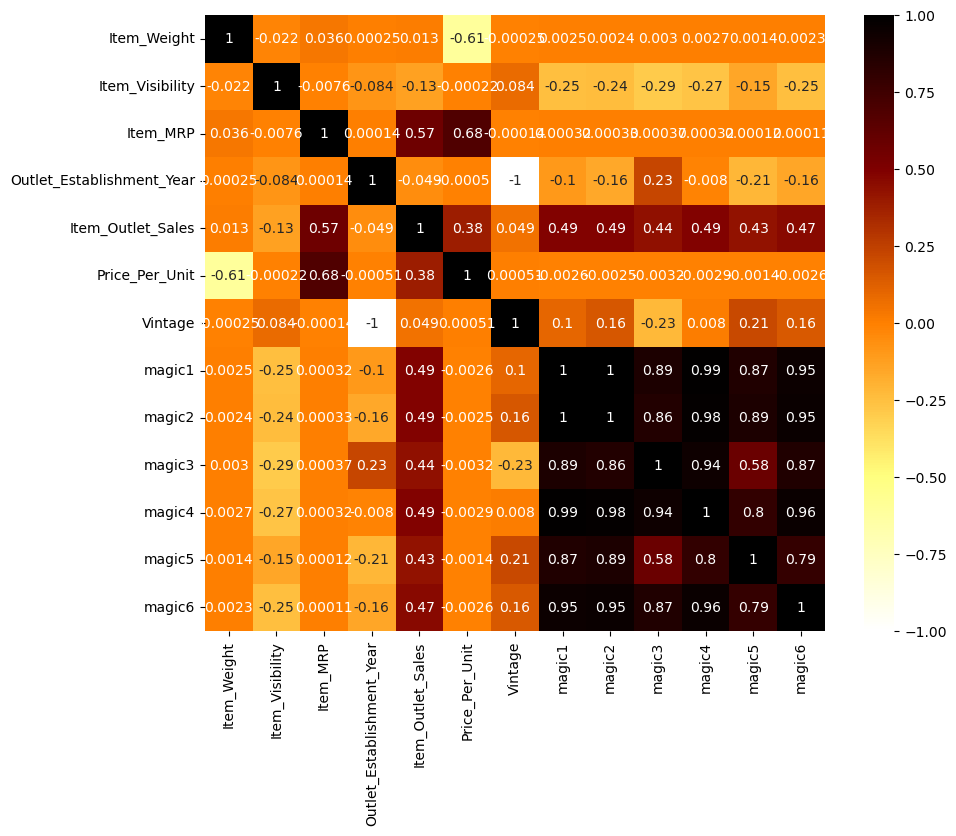

In [62]:
plt.figure(figsize=(10, 8))
sns.heatmap(combined.corr(), annot = True, cmap = "afmhot_r")

In [63]:
# With Item Type

combined.groupby("Outlet_Type")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Type,,,,,,,,
Grocery Store,1083.0,339.828500,260.851582,33.2900,153.79980,256.9988,458.73620,1775.6886
Supermarket Type1,5577.0,2316.181148,1515.965558,73.2380,1151.16820,1990.7420,3135.91800,10256.6490
Supermarket Type2,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
Supermarket Type3,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648


In [64]:
# Outlet_Type vs Sales
combined['magic7'] = combined.groupby("Outlet_Type")\
["Item_Outlet_Sales"].transform("mean")

combined['magic8'] = combined.groupby("Outlet_Type")\
["Item_Outlet_Sales"].transform("median")

combined['magic9'] = combined.groupby("Outlet_Type")\
["Item_Outlet_Sales"].transform("min")

combined['magic10'] = combined.groupby("Outlet_Type")\
["Item_Outlet_Sales"].transform("max")

combined['magic11'] = combined.groupby("Outlet_Type")\
["Item_Outlet_Sales"].transform("std")

combined['magic12'] = combined.groupby("Outlet_Type")\
["Item_Outlet_Sales"].transform("nunique")

In [65]:
combined.loc[:, ["magic7","magic8", "magic9", 
                 "magic10","magic11","magic12", "Item_Outlet_Sales"]].corr()

,magic7,magic8,magic9,magic10,magic11,magic12,Item_Outlet_Sales
magic7,1.000000,0.998299,0.797615,0.954587,0.989893,0.287261,0.489464
magic8,0.998299,1.000000,0.828556,0.945835,0.979977,0.254348,0.488632
magic9,0.797615,0.828556,1.000000,0.628858,0.708220,-0.264982,0.390387
magic10,0.954587,0.945835,0.628858,1.000000,0.965733,0.554092,0.467234
magic11,0.989893,0.979977,0.708220,0.965733,1.000000,0.373020,0.484518
magic12,0.287261,0.254348,-0.264982,0.554092,0.373020,1.000000,0.140675
Item_Outlet_Sales,0.489464,0.488632,0.390387,0.467234,0.484518,0.140675,1.000000


In [66]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,magic3,magic4,magic5,magic6,magic7,magic8,magic9,magic10,magic11,magic12
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,785,1513.289464,111.8544,7646.0472,2316.181148,1990.7420,73.2380,10256.6490,1515.965558,2674
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,779,1375.932889,69.2432,6768.5228,1995.498739,1655.1788,69.2432,6768.5228,1375.932889,779
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,785,1513.289464,111.8544,7646.0472,2316.181148,1990.7420,73.2380,10256.6490,1515.965558,2674
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,...,391,271.014855,33.2900,1775.6886,339.828500,256.9988,33.2900,1775.6886,260.851582,571
4,NCD19,8.93,Non Edible,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,...,788,1533.531664,73.2380,10256.6490,2316.181148,1990.7420,73.2380,10256.6490,1515.965558,2674


In [67]:
# Drop the Features that we do not need
new = combined.drop(["Item_Identifier", "Item_Type", "Outlet_Identifier", 
              "Outlet_Establishment_Year"], axis =1)

In [68]:
# Split the Data in Train and Test

newtrain = new.loc[0:train.shape[0]-1, :]
newtest = new.loc[train.shape[0]:, :]

newtrain.shape, newtest.shape, train.shape, test.shape

((8523, 24), (5681, 24), (8523, 12), (5681, 11))

In [69]:
# X
X = newtrain.drop("Item_Outlet_Sales", axis = 1)

# y
y = newtrain.Item_Outlet_Sales

# Item Outlet Sales to be dropped from test set
newtest = newtest.drop("Item_Outlet_Sales", axis = 1)


### Statistical Analysis

In [70]:
# Lets perform Two Sample TTest on the Num Vars

nums = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Price_Per_Unit', 'Vintage', 'magic1', 'magic2', 'magic3', 'magic4',
       'magic5', 'magic6', 'magic7', 'magic8', 'magic9', 'magic10', 'magic11',
       'magic12']

for i in nums:
    teststats, pvalue = stats.ttest_ind(newtrain.loc[:, i], 
                                        newtrain.Item_Outlet_Sales)
    print("PValue for ", i, "Var is: ", pvalue)

NameError: name 'stats' is not defined

In [ ]:
# Drop Magic1 & Magic 7
X.drop(["magic1", 'magic7'], axis = 1, inplace = True)
newtest.drop(["magic1", 'magic7'], axis = 1, inplace = True)

In [71]:
newtrain.select_dtypes(include = "object").columns

Index(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'item_ids', 'Item_Type_Cat'],
      dtype='object')

In [72]:
# Item Fat Content & Others....

import statsmodels.formula.api as sfa

model = sfa.ols("Item_Outlet_Sales~Item_Fat_Content+Outlet_Size+\
Outlet_Location_Type+Outlet_Type+item_ids+Item_Type_Cat", data = newtrain).fit()

In [73]:
from statsmodels.stats.anova import anova_lm

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Item_Fat_Content,2.0,9.201502e+06,4.600751e+06,2.080158,1.249739e-01
Outlet_Size,2.0,1.184389e+09,5.921943e+08,267.751503,1.692967e-113
Outlet_Location_Type,2.0,1.419529e+09,7.097646e+08,320.909102,4.323114e-135
Outlet_Type,3.0,3.343020e+09,1.114340e+09,503.831548,2.168788e-301
item_ids,2.0,2.662183e+07,1.331092e+07,6.018325,2.444112e-03
Item_Type_Cat,1.0,1.199214e+07,1.199214e+07,5.422058,1.990720e-02
Residual,8511.0,1.882404e+10,2.211731e+06,NaN,NaN


In [74]:
# Cat into Numbers

X = pd.get_dummies(X, drop_first = True)
newtest = pd.get_dummies(newtest, drop_first = True)

### Model Building 

* Linear Regression
* Decision Tree
* Random Forest
* Gradient Boosting
* XGB Regressor

In [75]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


# Initiate the Machine Instance....
lr = LinearRegression()
rf = RandomForestRegressor()
gbm = GradientBoostingRegressor()
xgb = XGBRegressor()

# Initiate the KFold Instance

kfold = KFold(n_splits=10, shuffle = True, random_state = 0 )

In [76]:
# Linear Regression

pred = []

for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred.append(lr.fit(xtrain, ytrain).predict(newtest))

In [77]:
predicted = np.abs(pd.DataFrame(pred).T.mean(axis = 1))

In [78]:
# Prepare the Submission File

submission = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                          "Outlet_Identifier": test.Outlet_Identifier,
                          "Item_Outlet_Sales": predicted})

submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1806.690449
1,FDW14,OUT017,1597.271174
2,NCN55,OUT010,1904.830147
3,FDQ58,OUT017,2569.374142
4,FDY38,OUT027,5218.622444


In [79]:
submission.to_csv("BIGMART_lr.csv", index = False) 

In [80]:
# Random Forest Model
pred_rf = []

for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_rf.append(rf.fit(xtrain, ytrain).predict(newtest))

In [81]:
predicted = np.abs(pd.DataFrame(pred_rf).T.mean(axis = 1))

submission = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                          "Outlet_Identifier": test.Outlet_Identifier,
                          "Item_Outlet_Sales": predicted})

In [82]:
submission.to_csv("BIGMART_rf.csv", index = False) # 1190.3

In [83]:
# Gradient Boosting Model
pred_gbm = []

for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_gbm.append(gbm.fit(xtrain, ytrain).predict(newtest))

In [84]:
predicted = np.abs(pd.DataFrame(pred_gbm).T.mean(axis = 1))

submission = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                          "Outlet_Identifier": test.Outlet_Identifier,
                          "Item_Outlet_Sales": predicted})

In [85]:
submission.to_csv("BIGMART_GBM.csv", index = False) # 1152.828

In [86]:
# Gradient Boosting Model
pred_xgb = []

for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_xgb.append(xgb.fit(xtrain, ytrain).predict(newtest))

In [87]:
predicted = np.abs(pd.DataFrame(pred_xgb).T.mean(axis = 1))

submission = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                          "Outlet_Identifier": test.Outlet_Identifier,
                          "Item_Outlet_Sales": predicted})

In [88]:
submission.to_csv("BIGMART_XGB.csv", index = False) # 1188

In [89]:
# Light GBM
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()

pred_lgbm = []

for train_index, test_index in kfold.split(X):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_lgbm.append(lgbm.fit(xtrain, ytrain).predict(newtest))
    
predicted = pd.DataFrame(pred_lgbm).T.mean(axis = 1)

In [90]:
submission = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                          "Outlet_Identifier": test.Outlet_Identifier,
                          "Item_Outlet_Sales": predicted})

In [91]:
submission.to_csv("BIGMART_LGBM.csv", index = False) # 1172

In [92]:
# Drop the Vars - 8, 9...12

newx = X.drop(['magic8', 'magic9', 'magic10', 
               'magic11', 'magic12'], axis = 1)
new_test = newtest.drop(['magic8', 'magic9', 
                         'magic10', 'magic11', 'magic12'], axis = 1)

In [93]:
lgbm = LGBMRegressor()

pred_lgbm = []

for train_index, test_index in kfold.split(newx):
    xtrain = newx.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_lgbm.append(lgbm.fit(xtrain, ytrain).predict(new_test))
    
predicted = pd.DataFrame(pred_lgbm).T.mean(axis = 1)

In [94]:
submission = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                          "Outlet_Identifier": test.Outlet_Identifier,
                          "Item_Outlet_Sales": predicted})

submission.to_csv("BIGMART_LGBMNEW.csv", index = False) # 1172

In [95]:
pred_gbm = [] # store the predicted values.

for train_index, test_index in kfold.split(newx, y):
    xtrain = newx.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_gbm.append(gbm.fit(xtrain, ytrain).predict(new_test))
    
predicted = np.abs(pd.DataFrame(pred_gbm).T.mean(axis = 1)) # able to reduce the variance

In [96]:
submission = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                          "Outlet_Identifier": test.Outlet_Identifier,
                          "Item_Outlet_Sales": np.abs(predicted)})

submission.to_csv("BIGMART_GBMNEW.csv", index = False) # 1152

#### parameter tuning of Gradient Boosting Machines

In [97]:
params = {'learning_rate':[0.1, 0.01, 0.001, 0.5],
         'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
         'n_estimators':[100, 200, 500],
         'criterion':['friedman_mse', '‘squared_error'],
         'min_samples_split':[2,4,6,8]}

In [99]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = gbm,
                   param_grid = params, 
                    scoring = "neg_root_mean_squared_error",
                   cv = 5)

In [ ]:
grid.fit(newx, y)

#### Other Steps

* Sequential Feature Selector using GBM
* Feature Importance using GBM and try to build another model.
* Parameter Tuning of GBM, XGB and LightGBM...
* Stacking Model

* PCA helps to do eda and identify the variables that have max variance...those set of feature might help in finding the correct features...in Supervised, PCA is not able to do a good job.

* The reason is we loose lot of data...to reduce the data from n dimensions to 2 dimensions.

How Cross Validation Works?

* We take one data and normally we split the data in train and test.
* But this approach is not an effective approach. Because may be there is some pattern in the test set which ideally should have been exposed in the training.

* Cross Validation Approach - We will use training data to build a cross validation dataset and the aglorithm we use is called KFold Cross Validation. Using Kfold, it will generate multiple folds of data and every fold is used for training and testing. As a result, our model will be able to control the **variance** and also reduce the **bias.**

In [ ]:
for train_index, test_index in kfold.split(X):
    print(train_index, test_index)